# Régression linéaire avec descente de gradient from scratch - une variable

Dans cet exercice, on va réimplementer une régression linéaire **depuis zéro (from scratch)** en utilisant la méthode de **descente de gradient (gradient descent)**. On part du modèle suivant à une variable : $ y = f_{\theta}(x) = \theta_0 + \theta_1 * x + \epsilon$ 

où y désigne la variable cible (*target*) et x une variable explicative (*feature*).

On cherche à estimer $\theta_0$ et $\theta_1$. Dans ce notebook, on va créer plusieurs fonctions intermédiaires pour implémenter la descente de gradient.On vérifiera ensuite les paramètres obtenus en sortie en utilisant des données simulées.

1. Coder la fonction **predict_linear(x, theta0, theta1)** pour une régression linéaire utilisant une variable : $ \hat{y} = f_{\theta}(x) = \theta_0 + \theta_1 * x$


In [1]:
def predict_linear(x, theta0, theta1):
    return theta0 + theta1*x

Pour trouver les paramètres d'un modèle, il est habituel d'utiliser la moyenne des erreurs au carré (Mean Squared Error - MSE) comme fonction de coût.

2. En partant du modèle précédent et avoir défini la MSE,coder la fonction **mse(predictions, labels)** qui calcule la MSE entre les prédictions d'un modèle et les labels ($y$)


In [2]:
def mse(predictions, labels):
    sum_error = 0
    
    for i in range(len(labels)):
        prediction_error = (labels[i] - predictions[i])**2
        sum_error+= (prediction_error)
        
    return float(sum_error / (2*len(labels)))

3. Coder la fonction **grad(x**_**, y, theta0**_ **,theta1)** qui calcule le gradient de la fonction **de coût** pour la régression linéaire (la MSE). Le type de retour devra être un vecteur numpy


In [3]:
def grad(x, y, theta0,theta1):
    cost_theta0 = 0.0
    cost_theta1 = 0.0   
    
    for j in range(len(y)):
        partial_deriv_theta0 = -2 * (y[j] - (theta0 + theta1*x[j]))
        partial_deriv_theta1 = (-2 * x[j]) * (y[j] - (theta0 + theta1*x[j]))
        
        cost_theta0 +=partial_deriv_theta0
        cost_theta1 += partial_deriv_theta1
        
    return float(cost_theta0),float(cost_theta1)

4. Coder la fonction **compute_theta_sgd(theta0, theta1, learning_rate,x ,y)** et qui renvoie les nouveaux  $\theta$ selon la Stochastic Gradient Descent


In [4]:
def compute_theta_sgd(theta0, theta1, learning_rate,x ,y):
    
    deriv0,deriv1 = grad(x, y, theta0,theta1)
    
    dividedby = 2  
    new_theta0 = theta0 - (learning_rate * deriv0)
    new_theta1 = theta1 - (learning_rate * deriv1) 
    
    learning_rate = learning_rate/dividedby
    
    return float(new_theta0),float(new_theta1)


5. Reprendre les fonctions précédentes et faire une fonction **gradient_descent(X, y, theta_0, theta_1, learning_rate, n_iterations)** pour effectuer la descente de gradient et qui retourne theta0 et theta1 après l'entraînement (sous forme de liste)
 - learning_rate : Taux d'apprentissage
 - n_iterations : Nombre d'itérations
 

In [5]:
def gradient_descent(X, y, theta0, theta1, learning_rate, n_iterations):
    
    theta0_L,theta1_L, MSE = [], [],[]
    batch_size = X.shape[0] #lecture de toutes les obs - à modifier pour mini-batch ou online
    #batch_size = 10
    cur_iter = 0
    
    theta0_L.append(theta0)
    theta1_L.append(theta1)
  
    theta_old = np.array([theta0, theta1])  
    theta_new = np.array([0, 0]) 

    while(cur_iter<=n_iterations): #and (np.isclose(theta_new,theta_old, atol = 1e-8).any()==False):
        indexes = np.random.randint(0, len(X), batch_size) # mini-batch avec random à chaque itération - eviter effets de cycle, mini-batch
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
                                           
        theta_old = np.array([theta0, theta1])  
    
        [theta0,theta1] = compute_theta_sgd(theta0, theta1, learning_rate,Xs ,ys)
        
        theta_new = np.array([theta0, theta1]) 
        
        theta0_L.append(theta0)
        theta1_L.append(theta1)
        MSE.append(mse(ys, theta0+theta1*Xs)) 
        
        
        cur_iter+=1
        
    return theta0_L, theta1_L, MSE, cur_iter

In [ ]:
M=


https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1
https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

https://mrmint.fr/gradient-descent-algorithm


6. Tester la fonction **gradient_descent(X, y, theta_0, theta_1, learning_rate, n_iterations)** sur les jeux de données suivants:
 - Jeu de données simulées (pouvant être modifié):
     - theta0 = 5
     - theta1 = 3
     - X = 2 * np.random.rand(100,1)
     - Y = theta0 +theta1 * X+np.random.randn(100,1)

     - Initialiser theta0 et theta1 de façon aléatoire (via la fonction random) et comparer les derniers theta_0 et theta_1    générés dans la fonction **gradient_descent** aux valeurs choisies dans la simulation (theta0 = 2, theta1 = 3)


 - Jeu de données Boston Housing data
 
    - Charger les données avec la commande `from sklearn.datasets import load_boston`
    - Récupérer dans un dataframe les variables Y = `MEDV` (target - prix de l'immobilier) et X = `RM` (surface habitée)
    - Faire la régression linéaire de Y en fonction de X puis récupérer les theta0 et theta1 estimés
    - Lancer la fonction **gradient_descent** à partir de Y, X et en initialisant aléatoirement theta0 et theta1
    - Comparer les theta obtenus en sortie à ceux de la régression linéaire via scikit-learn


 - Pour les 2 jeux de données:
 
    - Tracer le nuage de points de Y en fonction de X
    - Tracer la courbe de la fonction de coût en fonction des itérations
    - Tracer les courbes de theta0 et theta1 en fonction des itérations
    - Tracer des Y et des prédictions $ \hat{y}$


In [6]:
#Applications jeux de données simulées et Boston House pricing

No handles with labels found to put in legend.


Les valeurs estimées sont 5.077949069155131 et 2.9104726436201895 obtenus en 1001 itérations


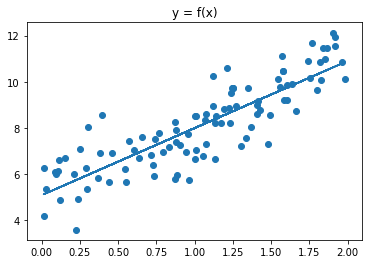

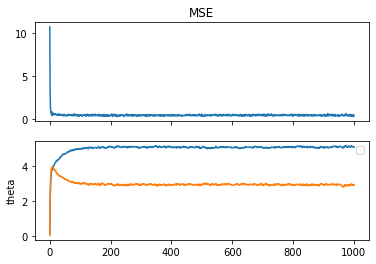

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# données simulées
np.random.seed(1234)
x = 2 * np.random.rand(100,1)
y = 5 + 3 *x + np.random.randn(100,1)

theta0_sim = 5
theta1_sim = 3

# Algo
theta0 = 0.4*np.random.rand(1,1)
theta1 = 0.3*np.random.rand(1,1)
print(theta0)
print(theta1)

nb_it = 1000
l_r = 0.001

#a learning rate taken within the set {.1, .01, 10−3, 10−4 , 10−5}


theta0_L, theta1_L, MSE, cur_iter = gradient_descent(x, y, theta0, theta1, l_r, nb_it)

# 
print(f"Les valeurs estimées sont {theta0_L[-1]} et {theta1_L[-1]} obtenus en {cur_iter} itérations")

plt.scatter(x,y)
plt.title('y = f(x)')
plt.plot(x,predict_linear(x, theta0_L[-1], theta1_L[-1]))

fig,ax = plt.subplots(2,sharex=True)
# MSE en fonction des itérations
ax[0].plot(MSE)
ax[0].set_title("MSE")
# theta0_L et theta1_L en fonction des itérations
ax[1].plot(theta0_L)
ax[1].legend(loc="best")
ax[1].plot(theta1_L)
ax[1].set_ylabel("theta")
plt.show()